# Required Packages for Geo data

numpy - math package

pandas - data analysis and aggregation

shapely - geometric shapes (GEOS)

fiona - read/write files (OGR)

pyproj - cartographic projections (the world isn't as nice and round as we'd like it to be)

descartes - mapping

geopy - geocoding

rtree - spacial analysis

pysal - coloring maps

In [ ]:
# ! pip3 install pysal
# ! pip3 install pillow
# ! pip3 install geopandas
# ! pip3 install rtree

In [58]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

## Pandas DataFrame to GeoDataFrame

1. Read in data from csv file

2. Create shapely points using Shapely

3. Create the geodataframe with the data and the shapely points

4. Sanity check that you're using lat/lon

In [59]:
denver_crime = pd.read_csv("./Denver_crime/crime.csv", encoding_errors='ignore')
denver_crime.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1
4,2020600882,2020600882299900,2999,0,criminal-mischief-other,public-disorder,10/8/2020 2:26:00 AM,NaN,10/8/2020 3:43:00 AM,2100 W 30TH AVE,3137149.0,1701888.0,-105.012173,39.759477,1,113,highland,1,0,1


In [60]:
#Sanity check:
denver_crime.shape

(370763, 20)

In [63]:
#We have two features that contain longitude and latitude:
denver_crime["geo_lon"]
# denver_crime["geo_lat"]

0        -104.998910
1        -104.993342
2        -105.025520
3        -104.845074
4        -105.012173
             ...    
370758   -105.025075
370759   -104.915106
370760   -104.870142
370761   -105.023225
370762   -104.981369
Name: geo_lon, Length: 370763, dtype: float64

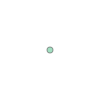

In [65]:
#Let's create a point:
# Point(-104.998910, 39.733957)
Point([-104.998910, 39.733957])

#Ta-da !

In [67]:
# Let's create a series of Points using the longitude and latitude:

# crime_points = denver_crime.apply(lambda row: Point(row["geo_lon"], row["geo_lat"]))
crime_points = denver_crime.apply(lambda row: Point(row["geo_lon"], row["geo_lat"]), axis=1)
crime_points.head()

0    POINT (-104.9989101 39.7339566)
1     POINT (-104.9933421 39.746248)
2    POINT (-105.0255203 39.7828883)
3    POINT (-104.8450739 39.7830825)
4     POINT (-105.012173 39.7594773)
dtype: object

In [68]:
#Sanity check:
crime_points.shape

(370763,)

Now that we have the geometry feature we can create our geodataframe

In [69]:
gpd.GeoDataFrame(denver_crime)

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1
3,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1
4,2020600882,2020600882299900,2999,0,criminal-mischief-other,public-disorder,10/8/2020 2:26:00 AM,NaN,10/8/2020 3:43:00 AM,2100 W 30TH AVE,3137149.0,1701888.0,-105.012173,39.759477,1,113,highland,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370758,2024272227,2024272227240400,2404,0,theft-of-motor-vehicle,auto-theft,5/19/2024 12:00:00 AM,5/19/2024 9:00:00 AM,5/22/2024 4:19:00 PM,3106 S FEDERAL BLVD,3133711.0,1665665.0,-105.025075,39.660087,4,422,college-view-south-platte,1,0,1
370759,2024271442,2024271442240400,2404,0,theft-of-motor-vehicle,auto-theft,5/22/2024 3:30:00 AM,5/22/2024 7:00:00 AM,5/22/2024 7:52:00 AM,3699 S MONACO ST,3164695.0,1662180.0,-104.915106,39.650024,3,324,hampden-south,1,0,1
370760,2024272012,2024272012258900,2589,0,forgery-other,white-collar-crime,5/15/2024 12:01:00 AM,5/15/2024 11:59:00 PM,5/22/2024 12:09:00 PM,10150 E HARVARD AVE,3177303.0,1669895.0,-104.870142,39.670972,3,323,hampden,1,0,1
370761,2024270309,2024270309260100,2601,0,theft-confidence-game,white-collar-crime,5/19/2024 7:45:00 AM,NaN,5/19/2024 7:45:00 AM,3193 S DECATUR ST,3134234.0,1665228.0,-105.023225,39.658880,4,422,college-view-south-platte,1,0,1


In [70]:
denver_crime_geo = gpd.GeoDataFrame(denver_crime, geometry=crime_points)
denver_crime_geo.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,...,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1,POINT (-104.99891 39.73396)
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,...,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1,POINT (-104.99334 39.74625)
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,...,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1,POINT (-105.02552 39.78289)
3,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,...,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1,POINT (-104.84507 39.78308)
4,2020600882,2020600882299900,2999,0,criminal-mischief-other,public-disorder,10/8/2020 2:26:00 AM,NaN,10/8/2020 3:43:00 AM,2100 W 30TH AVE,...,1701888.0,-105.012173,39.759477,1,113,highland,1,0,1,POINT (-105.01217 39.75948)


The question now is : are are the values inside of our geometry ? Meters ? Lat and long ? Feet?

In [71]:
print(denver_crime_geo.crs)

None


In [72]:
#Let's fix this:
# denver_crime_geo.crs = {'init':'epsg:4326'} #deprecated

denver_crime_geo = denver_crime_geo.set_crs(epsg=4326) #latitude/longitude
# denver_crime_geo = denver_crime_geo.set_crs("EPSG:4326")

In [73]:
denver_crime_geo.head()

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count,geometry
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,...,1692612.0,-104.998910,39.733957,1,123,lincoln-park,1,0,1,POINT (-104.99891 39.73396)
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,...,1697098.0,-104.993342,39.746248,6,611,cbd,1,0,1,POINT (-104.99334 39.74625)
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,...,1710396.0,-105.025520,39.782888,1,111,berkeley,1,0,1,POINT (-105.02552 39.78289)
3,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,...,1710782.0,-104.845074,39.783082,5,521,montbello,1,0,1,POINT (-104.84507 39.78308)
4,2020600882,2020600882299900,2999,0,criminal-mischief-other,public-disorder,10/8/2020 2:26:00 AM,NaN,10/8/2020 3:43:00 AM,2100 W 30TH AVE,...,1701888.0,-105.012173,39.759477,1,113,highland,1,0,1,POINT (-105.01217 39.75948)


<Axes: >

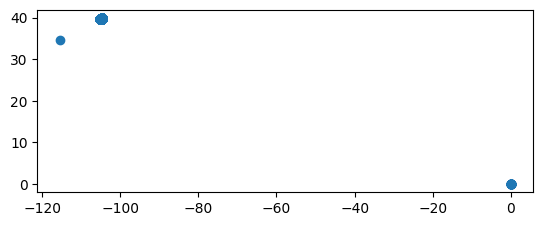

In [74]:
denver_crime_geo.plot()

## GeoPandas
Shape files are the primary way to use geographic data.

shp - shapefile (contains the geometries)

dbf - database (metadata, i.e. population, name, etc)

prj - projection

shx - index

### Load data from a local file

In [75]:
denver_crime = gpd.read_file("./Denver_crime/crime_shp/crime.shp")
denver_crime.head()

,INCIDENT_I,OFFENSE_ID,OFFENSE_CO,OFFENSE__1,OFFENSE_TY,OFFENSE_CA,FIRST_OCCU,LAST_OCCUR,REPORTED_D,INCIDENT_A,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_I,PRECINCT_I,NEIGHBORHO,IS_CRIME,IS_TRAFFIC,VICTIM_COU,geometry
0,2.020455e+09,2020454617299900,2999,0,criminal-mischief-other,public-disorder,2020-07-26,None,2020-07-27,15987 E RANDOLPH PL,...,0.0,-104.801111,39.797827,5,522,gateway-green-valley-ranch,1,0,1.0,POINT (-104.80111 39.79783)
1,2.020601e+10,20206013877299900,2999,0,criminal-mischief-other,public-disorder,2020-10-10,2020-10-10,2020-10-14,6980 E GIRARD AVE,...,0.0,-104.905807,39.654774,3,323,hampden,1,0,1.0,POINT (-104.90581 39.65477)
2,2.022108e+08,202210816299900,2999,0,criminal-mischief-other,public-disorder,2022-01-08,None,2022-01-08,3145 W ARKANSAS AVE,...,0.0,-105.027614,39.691784,4,421,mar-lee,1,0,1.0,POINT (-105.02761 39.69178)
3,2.021159e+09,2021159354299900,2999,0,criminal-mischief-other,public-disorder,2021-03-20,None,2021-03-20,2300 BLOCK N FEDERAL BLVD,...,0.0,-105.025019,39.751335,1,121,jefferson-park,1,0,1.0,POINT (-105.02502 39.75134)
4,2.020471e+09,2020470873299900,2999,0,criminal-mischief-other,public-disorder,2020-08-04,None,2020-08-04,900 BLK 10TH ST,...,0.0,-105.001965,39.740860,1,123,auraria,1,0,1.0,POINT (-105.00197 39.74086)


In [77]:
# denver_crime.crs

denver_crime.to_crs("EPSG:5071")

,INCIDENT_I,OFFENSE_ID,OFFENSE_CO,OFFENSE__1,OFFENSE_TY,OFFENSE_CA,FIRST_OCCU,LAST_OCCUR,REPORTED_D,INCIDENT_A,...,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_I,PRECINCT_I,NEIGHBORHO,IS_CRIME,IS_TRAFFIC,VICTIM_COU,geometry
0,2.020455e+09,2020454617299900,2999,0,criminal-mischief-other,public-disorder,2020-07-26,None,2020-07-27,15987 E RANDOLPH PL,...,0.0,-104.801111,39.797827,5,522,gateway-green-valley-ranch,1,0,1.0,POINT (-745803.239 1898882.432)
1,2.020601e+10,20206013877299900,2999,0,criminal-mischief-other,public-disorder,2020-10-10,2020-10-10,2020-10-14,6980 E GIRARD AVE,...,0.0,-104.905807,39.654774,3,323,hampden,1,0,1.0,POINT (-756149.392 1883748.707)
2,2.022108e+08,202210816299900,2999,0,criminal-mischief-other,public-disorder,2022-01-08,None,2022-01-08,3145 W ARKANSAS AVE,...,0.0,-105.027614,39.691784,4,421,mar-lee,1,0,1.0,POINT (-766067.149 1888853.293)
3,2.021159e+09,2021159354299900,2999,0,criminal-mischief-other,public-disorder,2021-03-20,None,2021-03-20,2300 BLOCK N FEDERAL BLVD,...,0.0,-105.025019,39.751335,1,121,jefferson-park,1,0,1.0,POINT (-765214.767 1895475.611)
4,2.020471e+09,2020470873299900,2999,0,criminal-mischief-other,public-disorder,2020-08-04,None,2020-08-04,900 BLK 10TH ST,...,0.0,-105.001965,39.740860,1,123,auraria,1,0,1.0,POINT (-763376.962 1894121.647)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366016,2.024265e+09,2024264602260700,2607,0,fraud-by-telephone,white-collar-crime,2024-05-17,None,2024-05-18,5051 N DURHAM CT,...,0.0,-104.819015,39.784763,5,521,montbello,1,0,1.0,POINT (-747451.712 1897565.460)
366017,2.024268e+09,2024267884260700,2607,0,fraud-by-telephone,white-collar-crime,2024-05-12,None,2024-05-20,2772 S WEBSTER ST,...,0.0,-105.078340,39.665844,4,423,bear-valley,1,0,1.0,POINT (-770635.855 1886369.729)
366018,2.024268e+09,2024267943260900,2609,0,fraud-by-use-of-computer,white-collar-crime,2024-05-14,2024-05-20,2024-05-20,9655 E CENTER AVE,...,0.0,-104.876609,39.707179,3,321,windsor,1,0,1.0,POINT (-753129.789 1889363.843)
366019,2.024267e+09,2024267380131506,1315,6,agg-aslt-shoot,aggravated-assault,2024-05-20,None,2024-05-20,15TH ST / WAZEE ST,...,0.0,-105.001244,39.750284,6,612,union-station,1,0,2.0,POINT (-763216.099 1895167.183)


In [78]:
denver_crime.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### We can explore the data just like a pandas dataframe

In [ ]:
denver_crime[denver_crime["VICTIM_COU"] > 5]

### Make a simple plot

In [ ]:
denver_crime.plot()

In [ ]:
denver_crime[denver_crime["VICTIM_COU"] > 5].plot()